<a href="https://colab.research.google.com/github/Jai14/FYP/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

//* changes have oocured*/

change

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imgs = r'/content/drive/MyDrive/data_cloud/train'

In [ ]:
import os

# Use os.listdir to get the list of files and directories in the specified path
contents = os.listdir(imgs)

# Print the contents
for item in contents:
    print(item)

YES
NO
train_set
evaluate_set


In [ ]:
import random
import shutil


# train image dir
train_imgs_dir = r'/content/drive/MyDrive/data_cloud/train/'

# Number of images to pick from each subfolder
num_images_to_train = 18
num_images_to_evaluate = 9

# Get the list of subfolders in the main directory
subfolders = [f.path for f in os.scandir(train_imgs_dir) if f.is_dir()]
print(subfolders)

['/content/drive/MyDrive/data_cloud/train/YES', '/content/drive/MyDrive/data_cloud/train/NO', '/content/drive/MyDrive/data_cloud/train/train_set', '/content/drive/MyDrive/data_cloud/train/evaluate_set']


In [ ]:
yes_subfolder = subfolders[0]
yes_subfolder

'/content/drive/MyDrive/data_cloud/train/YES'

In [ ]:
yes_subfolder_subfolder = [f.path for f in os.scandir(yes_subfolder) if f.is_dir()]
yes_subfolder_subfolder

['/content/drive/MyDrive/data_cloud/train/YES/c0']

In [ ]:
no_subfolder=subfolders[1]
no_subfolder

'/content/drive/MyDrive/data_cloud/train/NO'

In [ ]:
no_subfolder_subfolder = [f.path for f in os.scandir(no_subfolder) if f.is_dir()]
no_subfolder_subfolder

['/content/drive/MyDrive/data_cloud/train/NO/c9',
 '/content/drive/MyDrive/data_cloud/train/NO/c8',
 '/content/drive/MyDrive/data_cloud/train/NO/c6',
 '/content/drive/MyDrive/data_cloud/train/NO/c7',
 '/content/drive/MyDrive/data_cloud/train/NO/c5',
 '/content/drive/MyDrive/data_cloud/train/NO/c1',
 '/content/drive/MyDrive/data_cloud/train/NO/c2',
 '/content/drive/MyDrive/data_cloud/train/NO/c4',
 '/content/drive/MyDrive/data_cloud/train/NO/c3']

In [ ]:
images_yes = [f.path for f in os.scandir(yes_subfolder_subfolder[0]) if f.is_file() and f.name.endswith(('.jpg'))]

In [ ]:
print(images_yes[:5])

['/content/drive/MyDrive/data_cloud/train/YES/c0/img_1230.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_1363.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_1039.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_1256.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_3600.jpg']


In [ ]:
image_no=[]

In [ ]:
# Iterate through each directory
for directory in no_subfolder_subfolder:
    # Iterate through each file in the directory
    for entry in os.scandir(directory):
        if entry.is_file() and entry.name.endswith('.jpg'):
            # Append the path of the image file to the list
            image_no.append(entry.path)

In [ ]:
print(image_no[:5])

['/content/drive/MyDrive/data_cloud/train/NO/c9/img_1640.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_144.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_1254.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_1442.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_1922.jpg']


In [ ]:
#### YES

In [ ]:
# Pick the specified number of images
selected_images_train = random.sample(images_yes, num_images_to_train)
selected_images_evaluate = random.sample(images_yes, int (num_images_to_evaluate))

# make destination directory
destination_dir_train = r'/content/drive/MyDrive/data_cloud/train/train_set'
destination_dir_evaluate = r'/content/drive/MyDrive/data_cloud/train/evaluate_set'

# Remove existing directories and create new ones
shutil.rmtree(destination_dir_train, ignore_errors=True)
shutil.rmtree(destination_dir_evaluate, ignore_errors=True)
os.makedirs(destination_dir_train)
os.makedirs(destination_dir_evaluate)

for image_path in selected_images_train:
    # Create the destination subfolder structure in the destination directory
    relative_path = os.path.relpath(image_path, imgs)
    relative_path = relative_path.replace("/c0","")
    destination_path = os.path.join(destination_dir_train, relative_path)
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    # Copy the image
    shutil.copyfile(image_path, destination_path)

print(f"{num_images_to_train} images from each subfolder have been copied to {destination_dir_train}.")

for image_path in selected_images_evaluate:
    # Create the destination subfolder structure in the destination directory
    relative_path = os.path.relpath(image_path, imgs)
    relative_path = relative_path.replace("/c0","")
    destination_path = os.path.join(destination_dir_evaluate, relative_path)
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    # Copy the image
    shutil.copyfile(image_path, destination_path)

print(f"{num_images_to_evaluate} images from each subfolder have been copied to {destination_dir_evaluate}.")

18 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
9 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/evaluate_set.


In [ ]:
#### NO

In [ ]:

for folder in no_subfolder_subfolder:

    images = [f.path for f in os.scandir(folder) if f.is_file() and f.name.endswith(('.jpg'))]
    # print(images[:3])
    # Pick the specified number of images
    selected_images_train = random.sample(images, int(num_images_to_train / 9))
    selected_images_evaluate = random.sample(images, int(num_images_to_evaluate / 9))

    # make destination directory
    destination_dir_train = r'/content/drive/MyDrive/data_cloud/train/train_set'
    destination_dir_evaluate = r'/content/drive/MyDrive/data_cloud/train/evaluate_set'

    os.makedirs(destination_dir_train,exist_ok=True)
    os.makedirs(destination_dir_evaluate,exist_ok=True)

    for image_path in selected_images_train:
        # Create the destination subfolder structure in the destination directory
        relative_path = os.path.relpath(image_path, imgs)

         # Define the list of 'cX' values to replace
        c_values_to_replace = [f'/c{i}' for i in range(10)]

        # Remove 'cX' values from the relative_path
        for c_value in c_values_to_replace:
            relative_path = relative_path.replace(c_value, '')

        destination_path = os.path.join(destination_dir_train, relative_path)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        # Copy the image
        shutil.copyfile(image_path, destination_path)

    print(f"{num_images_to_train / 9} images from each subfolder have been copied to {destination_dir_train}.")

    for image_path in selected_images_evaluate:
        # Create the destination subfolder structure in the destination directory
        relative_path = os.path.relpath(image_path, imgs)

        # Define the list of 'cX' values to replace
        c_values_to_replace = [f'/c{i}' for i in range(10)]

        # Remove 'cX' values from the relative_path
        for c_value in c_values_to_replace:
            relative_path = relative_path.replace(c_value, '')

        destination_path = os.path.join(destination_dir_evaluate, relative_path)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        # Copy the image
        shutil.copyfile(image_path, destination_path)

print(f"{num_images_to_evaluate / 9} images from each subfolder have been copied to {destination_dir_evaluate}.")

2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
2.0 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
1.0 images from each subfolder have been copied to /content/drive/MyDrive/data_clo

In [ ]:
import torch
from pprint import pprint

# Check if GPU is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()

    print(f"Number of available GPUs: {num_gpus}")

    # Print information about each GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

    # Check if PyTorch is currently using GPU
    current_device = torch.cuda.current_device()
    print(f"\nPyTorch is currently using GPU: {torch.cuda.get_device_name(current_device)}")
else:
    print("No GPU available. PyTorch is using CPU.")

Number of available GPUs: 1
GPU 0: Tesla T4

PyTorch is currently using GPU: Tesla T4


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [ ]:
train_transforms = A.Compose(
    [
        A.Resize(height=250, width=250),  # Resize to 250x250"
        ToTensorV2(),
    ]
)

In [ ]:
train_images = [f.path for f in os.scandir('/content/drive/MyDrive/data_cloud/train/train_set/YES') if f.is_file() and f.name.endswith(('.jpg'))]

In [ ]:
train_images += [f.path for f in os.scandir('/content/drive/MyDrive/data_cloud/train/train_set/NO') if f.is_file() and f.name.endswith(('.jpg'))]

In [ ]:
test_images = [f.path for f in os.scandir('/content/drive/MyDrive/data_cloud/train/evaluate_set/YES') if f.is_file() and f.name.endswith(('.jpg'))]

In [ ]:
test_images += [f.path for f in os.scandir('/content/drive/MyDrive/data_cloud/train/evaluate_set/NO') if f.is_file() and f.name.endswith(('.jpg'))]

In [ ]:
pprint(train_images)

['/content/drive/MyDrive/data_cloud/train/train_set/YES/img_3432.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_316.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_1230.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_2805.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_800.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_2764.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_2653.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_2528.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_3349.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_262.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_772.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_2843.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_3243.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_3420.jpg',
 '/content

In [ ]:
pprint(test_images)

['/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_1230.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_609.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_3509.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_2813.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_1039.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_2695.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_327.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_3100.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/YES/img_3093.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/NO/img_144.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/NO/img_1282.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/NO/img_1207.jpg',
 '/content/drive/MyDrive/data_cloud/train/evaluate_set/NO/img_340.jpg',
 '/content/drive/MyDrive/data_cloud/train/eval

In [ ]:
#######################################################
#      Create dictionary for class indexes
#######################################################

all_paths = test_images + train_images
name_to_label = {}

# Process each file path
for file_path in all_paths:
    # Split the file path into parts
    path_parts = file_path.split('/')
    # Extract the label from the path
    label = path_parts[-2]
    # Extract the image file name
    image_file = path_parts[-1]
    # Add the label and image file to the dictionary
    name_to_label[image_file] = label

In [ ]:
Label = {"NO","YES"}

In [ ]:
pprint(name_to_label)

{'img_1016.jpg': 'NO',
 'img_1039.jpg': 'YES',
 'img_1057.jpg': 'NO',
 'img_1096.jpg': 'NO',
 'img_1153.jpg': 'NO',
 'img_1202.jpg': 'NO',
 'img_1207.jpg': 'NO',
 'img_1230.jpg': 'YES',
 'img_1247.jpg': 'NO',
 'img_1282.jpg': 'NO',
 'img_133.jpg': 'NO',
 'img_1363.jpg': 'YES',
 'img_144.jpg': 'NO',
 'img_1602.jpg': 'NO',
 'img_173.jpg': 'NO',
 'img_1789.jpg': 'NO',
 'img_216.jpg': 'NO',
 'img_2528.jpg': 'YES',
 'img_262.jpg': 'YES',
 'img_2653.jpg': 'YES',
 'img_2695.jpg': 'YES',
 'img_275.jpg': 'NO',
 'img_2764.jpg': 'YES',
 'img_2805.jpg': 'YES',
 'img_2813.jpg': 'YES',
 'img_2843.jpg': 'YES',
 'img_3093.jpg': 'YES',
 'img_3100.jpg': 'YES',
 'img_316.jpg': 'YES',
 'img_3243.jpg': 'YES',
 'img_327.jpg': 'YES',
 'img_3279.jpg': 'YES',
 'img_3326.jpg': 'YES',
 'img_3349.jpg': 'YES',
 'img_340.jpg': 'NO',
 'img_3420.jpg': 'YES',
 'img_3432.jpg': 'YES',
 'img_3509.jpg': 'YES',
 'img_357.jpg': 'NO',
 'img_443.jpg': 'NO',
 'img_54.jpg': 'NO',
 'img_597.jpg': 'NO',
 'img_609.jpg': 'YES',
 'i

In [ ]:
# label encoder sklearn kit

from sklearn.preprocessing import LabelEncoder

# Convert values to a list
labels = list(name_to_label.values())

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels
encoded_labels = label_encoder.fit_transform(labels)

# Assign the encoded labels back to the dictionary
encoded_name_to_label = {key: value for key, value in zip(name_to_label.keys(), encoded_labels)}

print(encoded_name_to_label)

{'img_1230.jpg': 1, 'img_609.jpg': 1, 'img_3509.jpg': 1, 'img_2813.jpg': 1, 'img_1039.jpg': 1, 'img_2695.jpg': 1, 'img_327.jpg': 1, 'img_3100.jpg': 1, 'img_3093.jpg': 1, 'img_144.jpg': 0, 'img_1282.jpg': 0, 'img_1207.jpg': 0, 'img_340.jpg': 0, 'img_275.jpg': 0, 'img_665.jpg': 0, 'img_1202.jpg': 0, 'img_597.jpg': 0, 'img_616.jpg': 0, 'img_3432.jpg': 1, 'img_316.jpg': 1, 'img_2805.jpg': 1, 'img_800.jpg': 1, 'img_2764.jpg': 1, 'img_2653.jpg': 1, 'img_2528.jpg': 1, 'img_3349.jpg': 1, 'img_262.jpg': 1, 'img_772.jpg': 1, 'img_2843.jpg': 1, 'img_3243.jpg': 1, 'img_3420.jpg': 1, 'img_1363.jpg': 1, 'img_3326.jpg': 1, 'img_3279.jpg': 1, 'img_957.jpg': 1, 'img_857.jpg': 0, 'img_54.jpg': 0, 'img_1057.jpg': 0, 'img_922.jpg': 0, 'img_1602.jpg': 0, 'img_1247.jpg': 0, 'img_729.jpg': 0, 'img_133.jpg': 0, 'img_1016.jpg': 0, 'img_443.jpg': 0, 'img_357.jpg': 0, 'img_761.jpg': 0, 'img_1096.jpg': 0, 'img_673.jpg': 0, 'img_173.jpg': 0, 'img_1789.jpg': 0, 'img_1153.jpg': 0, 'img_216.jpg': 0}


In [ ]:
# Create an empty dictionary
reverse_dict = {}

# Reverse key-value pairs
for key, value in encoded_name_to_label.items():
    if value not in reverse_dict:
        reverse_dict[value] = []
    reverse_dict[value].append(key)

# Print the new dictionary
print(reverse_dict)

{1: ['img_1230.jpg', 'img_609.jpg', 'img_3509.jpg', 'img_2813.jpg', 'img_1039.jpg', 'img_2695.jpg', 'img_327.jpg', 'img_3100.jpg', 'img_3093.jpg', 'img_3432.jpg', 'img_316.jpg', 'img_2805.jpg', 'img_800.jpg', 'img_2764.jpg', 'img_2653.jpg', 'img_2528.jpg', 'img_3349.jpg', 'img_262.jpg', 'img_772.jpg', 'img_2843.jpg', 'img_3243.jpg', 'img_3420.jpg', 'img_1363.jpg', 'img_3326.jpg', 'img_3279.jpg', 'img_957.jpg'], 0: ['img_144.jpg', 'img_1282.jpg', 'img_1207.jpg', 'img_340.jpg', 'img_275.jpg', 'img_665.jpg', 'img_1202.jpg', 'img_597.jpg', 'img_616.jpg', 'img_857.jpg', 'img_54.jpg', 'img_1057.jpg', 'img_922.jpg', 'img_1602.jpg', 'img_1247.jpg', 'img_729.jpg', 'img_133.jpg', 'img_1016.jpg', 'img_443.jpg', 'img_357.jpg', 'img_761.jpg', 'img_1096.jpg', 'img_673.jpg', 'img_173.jpg', 'img_1789.jpg', 'img_1153.jpg', 'img_216.jpg']}


In [ ]:
from torch.utils.data import Dataset
import cv2

In [ ]:
path_parts[-1]

'img_216.jpg'

In [ ]:
example = train_images[1]
temp = example.split('/')[-1]
print(example + " " + temp)

/content/drive/MyDrive/data_cloud/train/train_set/YES/img_316.jpg img_316.jpg


In [ ]:
encoded_name_to_label

{'img_1230.jpg': 1,
 'img_609.jpg': 1,
 'img_3509.jpg': 1,
 'img_2813.jpg': 1,
 'img_1039.jpg': 1,
 'img_2695.jpg': 1,
 'img_327.jpg': 1,
 'img_3100.jpg': 1,
 'img_3093.jpg': 1,
 'img_144.jpg': 0,
 'img_1282.jpg': 0,
 'img_1207.jpg': 0,
 'img_340.jpg': 0,
 'img_275.jpg': 0,
 'img_665.jpg': 0,
 'img_1202.jpg': 0,
 'img_597.jpg': 0,
 'img_616.jpg': 0,
 'img_3432.jpg': 1,
 'img_316.jpg': 1,
 'img_2805.jpg': 1,
 'img_800.jpg': 1,
 'img_2764.jpg': 1,
 'img_2653.jpg': 1,
 'img_2528.jpg': 1,
 'img_3349.jpg': 1,
 'img_262.jpg': 1,
 'img_772.jpg': 1,
 'img_2843.jpg': 1,
 'img_3243.jpg': 1,
 'img_3420.jpg': 1,
 'img_1363.jpg': 1,
 'img_3326.jpg': 1,
 'img_3279.jpg': 1,
 'img_957.jpg': 1,
 'img_857.jpg': 0,
 'img_54.jpg': 0,
 'img_1057.jpg': 0,
 'img_922.jpg': 0,
 'img_1602.jpg': 0,
 'img_1247.jpg': 0,
 'img_729.jpg': 0,
 'img_133.jpg': 0,
 'img_1016.jpg': 0,
 'img_443.jpg': 0,
 'img_357.jpg': 0,
 'img_761.jpg': 0,
 'img_1096.jpg': 0,
 'img_673.jpg': 0,
 'img_173.jpg': 0,
 'img_1789.jpg': 0,
 'im

In [ ]:
class Dataset(Dataset):
    def __init__(self, image_paths, encoded_name_to_label, transform=None):
        """
        Args:
            image_paths (list): List of file paths to images.
            labels (list): List of labels corresponding to the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.image_paths = image_paths
        self.labels = encoded_name_to_label
        self.transform = transform


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        image_name = image_filepath.split('/')[-1]

        if self.transform is not None and callable(self.transform):
            image = self.transform(image=image)["image"]

        # Convert image to PyTorch tensor
        # Convert to channels-first format

        # Convert label to PyTorch tensor
        label = self.labels.get(image_name)

        label_tensor = torch.tensor(label)

        return image, label_tensor

In [ ]:
#######################################################
#                  Create Dataset
#######################################################

train_dataset = Dataset(train_images,encoded_name_to_label,train_transforms)

In [ ]:
import torchvision.transforms.functional as TF

for i in range(30):
  image, label = train_dataset[i]
  image = TF.to_pil_image(image)  # Convert the tensor to a PIL Image
  image = np.array(image)
  plt.imshow(image)
  plt.title(f"Label: {label}")
  plt.axis('off')  # Turn off axis
  plt.show()

In [ ]:
#######################################################
#                  load Dataset
#######################################################

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

In [ ]:
print('The shape of tensor for 50th image in train dataset: ',train_dataset[0][0].shape)
print('The label for 50th image in train dataset: ',train_dataset[10][1])

The shape of tensor for 50th image in train dataset:  torch.Size([3, 250, 250])
The label for 50th image in train dataset:  tensor(1)


In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [ ]:
class CustomAlexNet(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomAlexNet, self).__init__()
        # Load pre-trained AlexNet model
        self.alexnet = models.alexnet(weights=False)

        # Modify the fully connected layers to match your number of classes
        in_features = self.alexnet.classifier[6].in_features
        self.alexnet.classifier[6] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.alexnet(x)

In [ ]:
class CustomBinaryNetwork(nn.Module):

  def __init__(self):
        super(CustomBinaryNetwork, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=11, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5, stride=2),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Calculate the input size for the fully connected layer
        self.fc_input_size = 16 * 59 * 59  # Adjusted input size for the fully connected layer
        self.fc_layers = nn.Sequential(
            nn.Linear(self.fc_input_size, 250),
            nn.ReLU(),
            nn.Linear(250, 60),
            nn.ReLU(),
            nn.Linear(60, 2),  # Binary classification
        )

  def forward(self, x):
        # Forward pass through convolutional layers
        x = self.conv_layers(x)
        # Flatten the output of the convolutional layers
        x = x.view(-1, self.fc_input_size)
        # Forward pass through fully connected layers
        x = self.fc_layers(x)
        return x

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model = CustomBinaryNetwork()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.10, momentum=0.45)

In [ ]:
num_epochs = 2
model.train()

CustomBinaryNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 8, kernel_size=(11, 11), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=55696, out_features=250, bias=True)
    (1): ReLU()
    (2): Linear(in_features=250, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=2, bias=True)
  )
)

In [ ]:
# Assuming you have a DataLoader named 'train_loader'
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        total_loss = 0.0
        optimizer.zero_grad()
        inputs = inputs.to(torch.float32)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')


Epoch [1/2], Loss: 0.0342
Epoch [2/2], Loss: 0.0376


In [ ]:
model.eval()

CustomBinaryNetwork(
  (conv_layers): Sequential(
    (0): Conv2d(3, 8, kernel_size=(11, 11), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=55696, out_features=250, bias=True)
    (1): ReLU()
    (2): Linear(in_features=250, out_features=60, bias=True)
    (3): ReLU()
    (4): Linear(in_features=60, out_features=2, bias=True)
  )
)

In [ ]:
def preprocess_image(image_path):
    # Open and convert the image to RGB
    image = Image.open(image_path).convert('RGB')

    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((250, 250)),  # Resize the image to 250x250 pixels
        transforms.ToTensor(),           # Convert the image to a PyTorch tensor
    ])

    # Apply the transformations and add a batch dimension
    input_tensor = transform(image).unsqueeze(0)

    # Convert the original image to a NumPy array
    original_image_np = np.array(image)

    return input_tensor, original_image_np

In [ ]:
tester = test_images

tensor([[-0.1421,  0.0557]])
tensor([1])


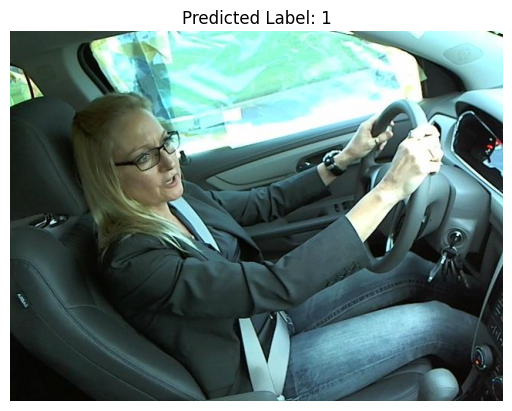

tensor([[-0.1422,  0.0607]])
tensor([1])


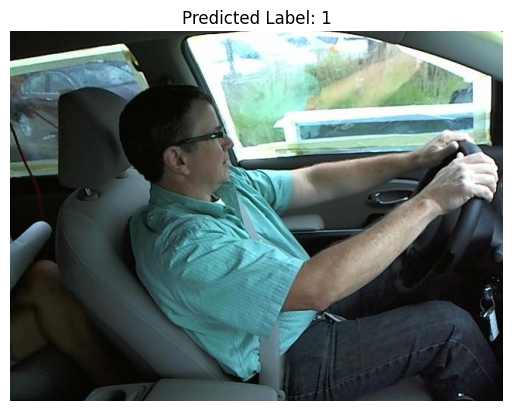

tensor([[-0.1360,  0.0627]])
tensor([1])


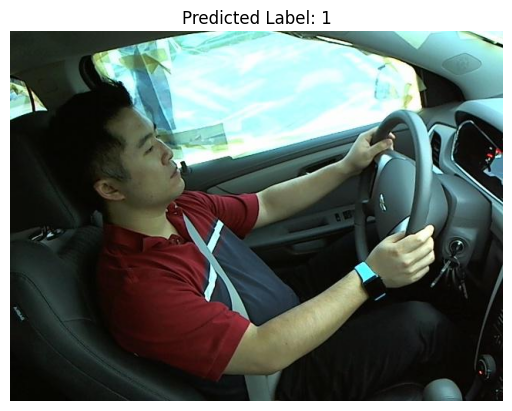

tensor([[-0.1385,  0.0581]])
tensor([1])


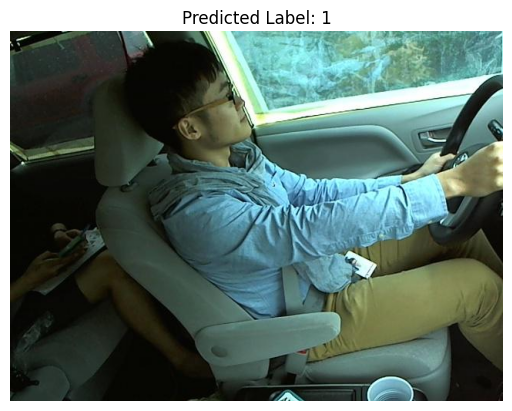

tensor([[-0.1471,  0.0599]])
tensor([1])


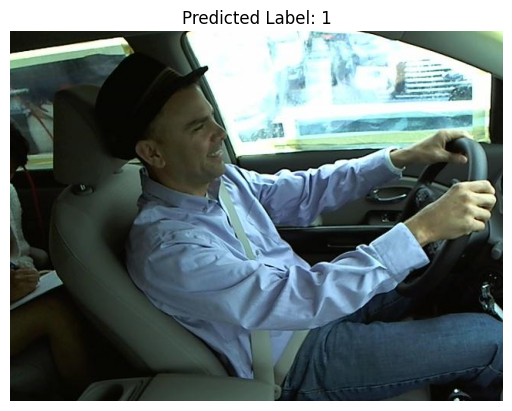

tensor([[-0.1411,  0.0605]])
tensor([1])


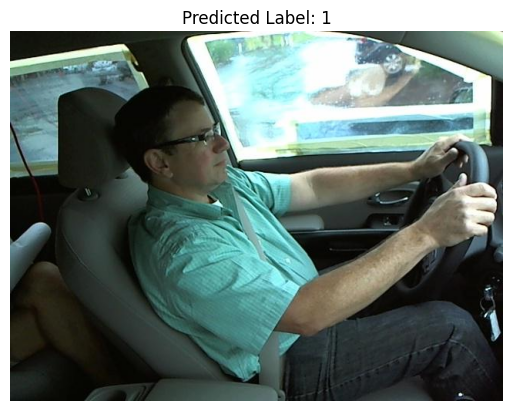

tensor([[-0.1421,  0.0658]])
tensor([1])


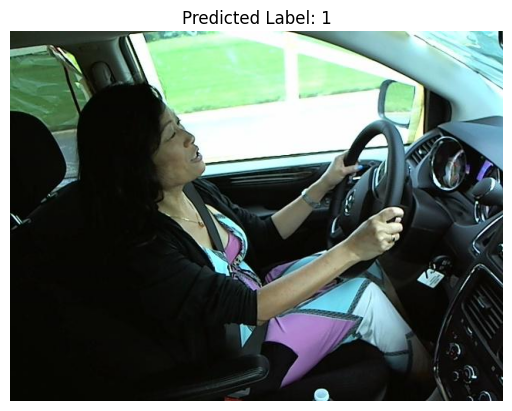

tensor([[-0.1377,  0.0594]])
tensor([1])


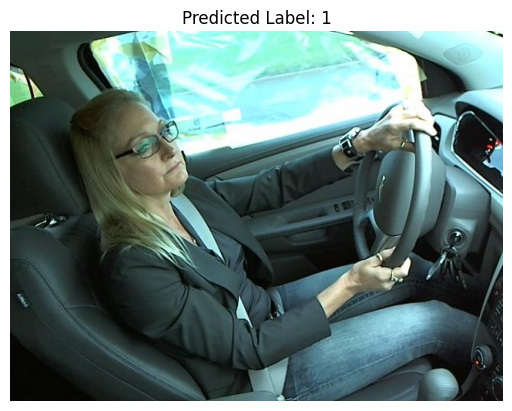

tensor([[-0.1351,  0.0564]])
tensor([1])


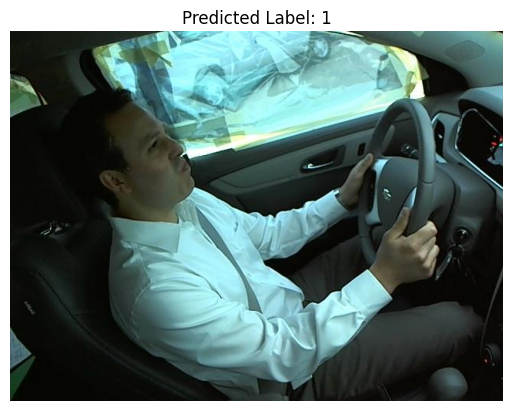

tensor([[-0.1462,  0.0649]])
tensor([1])


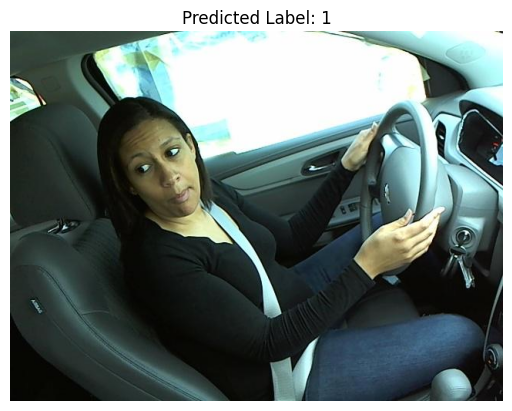

tensor([[-0.1408,  0.0584]])
tensor([1])


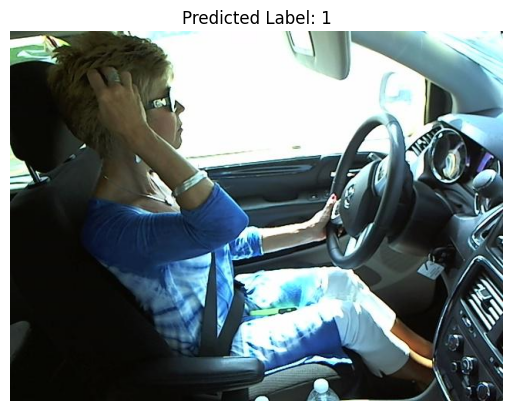

tensor([[-0.1373,  0.0598]])
tensor([1])


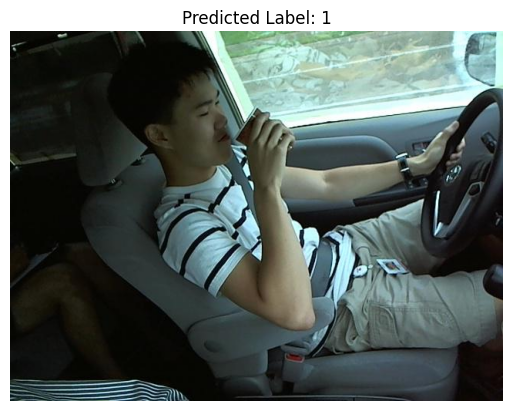

tensor([[-0.1449,  0.0690]])
tensor([1])


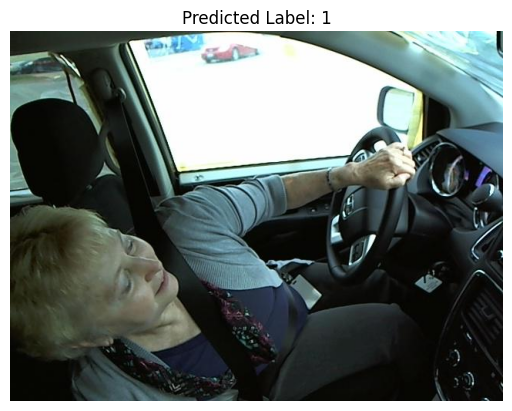

tensor([[-0.1446,  0.0620]])
tensor([1])


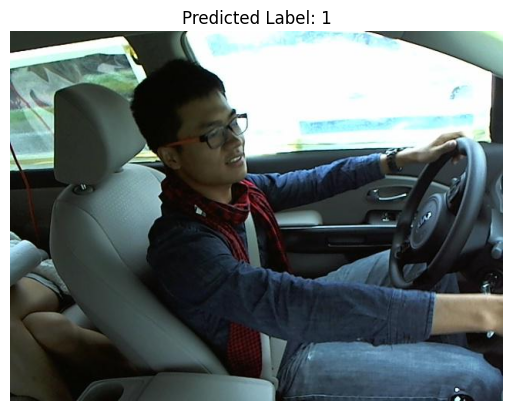

tensor([[-0.1415,  0.0587]])
tensor([1])


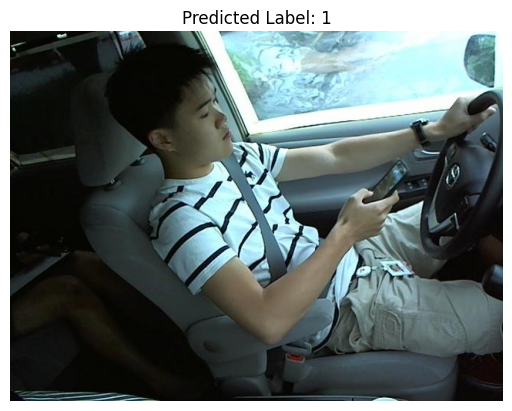

tensor([[-0.1399,  0.0579]])
tensor([1])


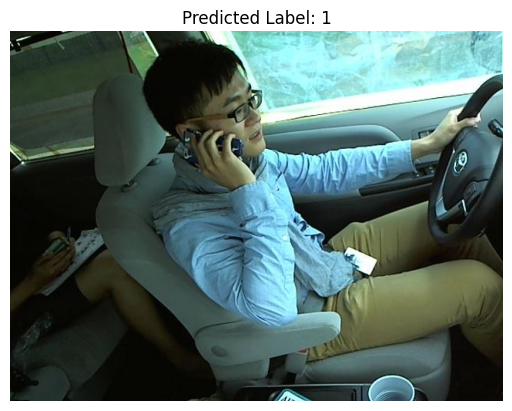

tensor([[-0.1438,  0.0629]])
tensor([1])


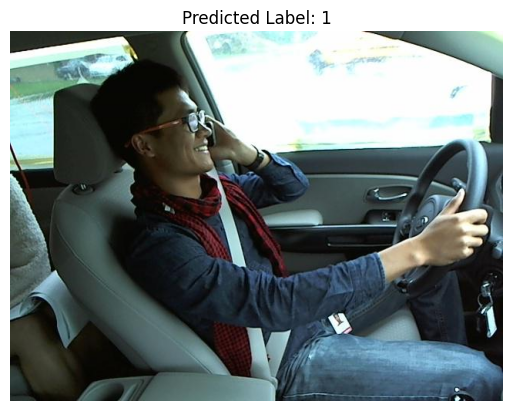

tensor([[-0.1433,  0.0605]])
tensor([1])


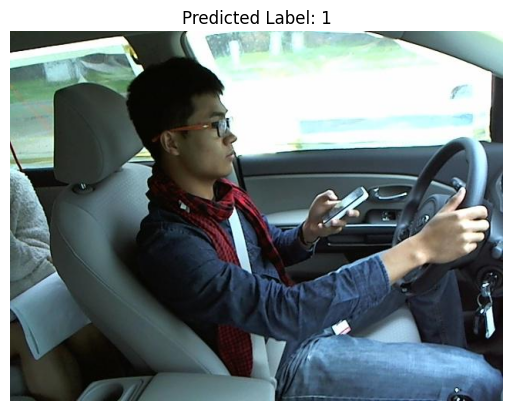

In [ ]:
for test in tester:
    input_tensor, pil_image = preprocess_image(test)

    with torch.no_grad():
        output = model(input_tensor)
        print(output)
    _, predicted_class = torch.max(output, 1)
    print(predicted_class)
    predicted_label = predicted_class.item()

    plt.imshow(pil_image)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()